In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [53]:
from src import spotify, dp, utils

In [5]:
# 1. Get Token
token = spotify.get_token()

# 2. Select Music
sel_tracks = spotify.search_tracks(token)

# 3. Data Processing
genres = spotify.get_genres(token, sel_tracks)
features = spotify.get_features(token, sel_tracks)
recos = spotify.get_recommend(sel_tracks, features, genres, token)
reco_features = spotify.get_features(token, recos)

계속하시려면 next, 종료는 exit를 입력해주세요.exit


### sel tracks (우체통)
- 사용자의 음악 성향

In [7]:
sel_tracks.head()

,id,name,artists,artists_name
0,2FWquqPNxte8iqZ3ATQG0p,All I Wanna Do (K) (Feat. Hoody & Loco),4XDi67ZENZcbfKnvMnTYsI,Jay Park
1,2SMq0lOqCTHayWa9juoI0d,We Are,5a8EJtOEbUJDF4RX3mKK02,Woo
2,6z7gU9SBoBdqEaMi4jPKc2,Still (feat.Crush),2e4G04F77jxVuDYo44TCSm,Loco
3,5xrtzzzikpG3BLbo4q1Yul,LILAC,3HqSLMAZ3g3d5poNaI7GOU,IU


In [9]:
features.head()

,id,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,2FWquqPNxte8iqZ3ATQG0p,0.403,0.724,8,-6.064,0.2460,0.3770,0.000000,0.0927,0.428,97.133
1,2SMq0lOqCTHayWa9juoI0d,0.756,0.808,7,-3.272,0.0752,0.1470,0.000000,0.1290,0.685,100.018
2,6z7gU9SBoBdqEaMi4jPKc2,0.727,0.731,11,-5.997,0.0416,0.0516,0.000000,0.0947,0.417,134.113
3,5xrtzzzikpG3BLbo4q1Yul,0.738,0.890,2,-2.275,0.0748,0.0895,0.000002,0.2130,0.750,114.942


### recos
- 사용자가 등록한 음악으로 Spotify API 에서 추천된 음악

In [8]:
recos.head()

,id,name,artists,artists_name
0,2PcJoVkfjcbvoqBxV1Nj7y,All I Wanna Do,4XDi67ZENZcbfKnvMnTYsI,Jay Park
1,6z1kLsntE7FuzKZHZWrXYN,instagram,3eCd0TZrBPm2n9cDG6yWfF,DEAN
2,2xYnqYBNL62ypPiA0wjD0s,AUTOMATIC,0LyfQWJT6nXafLPZqxe9Of,Various Artists
3,2IgbYlOlFpiSFYnsqB39lM,Jasmine,0siBQaURCli5wn2lqv8WZg,DPR LIVE
4,1cgBWgoL6520lR2QZDzdGN,MOVE,13rF01aOogvnkuQXOlgTW8,TAEMIN


In [10]:
reco_features.head()

,id,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,2PcJoVkfjcbvoqBxV1Nj7y,0.613,0.668,8,-6.867,0.2670,0.2450,0.0,0.0735,0.509,96.176
1,6z1kLsntE7FuzKZHZWrXYN,0.463,0.566,8,-6.195,0.1450,0.1960,0.0,0.2840,0.219,93.921
2,2xYnqYBNL62ypPiA0wjD0s,0.720,0.703,8,-5.281,0.0409,0.1330,0.0,0.1210,0.492,99.999
3,2IgbYlOlFpiSFYnsqB39lM,0.597,0.486,8,-5.893,0.0986,0.3310,0.0,0.1400,0.397,137.680
4,1cgBWgoL6520lR2QZDzdGN,0.697,0.713,8,-5.273,0.1150,0.0153,0.0,0.0857,0.667,99.964


### norm data
- 정규화

In [54]:
norm_features = dp.make_norm(features, reco_features)

norm_features.head()

,id,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,2FWquqPNxte8iqZ3ATQG0p,0.156202,0.582090,0.727273,0.405982,0.498087,0.446735,0.000000,0.073529,0.358914,0.192275
1,2SMq0lOqCTHayWa9juoI0d,0.696784,0.721393,0.636364,0.697971,0.113662,0.173665,0.000000,0.121622,0.662338,0.217311
2,6z7gU9SBoBdqEaMi4jPKc2,0.652374,0.593698,1.000000,0.412989,0.038037,0.060400,0.000000,0.076179,0.345927,0.513195
3,5xrtzzzikpG3BLbo4q1Yul,0.669219,0.857380,0.181818,0.802238,0.112762,0.105397,0.000018,0.232909,0.739079,0.346825
4,2PcJoVkfjcbvoqBxV1Nj7y,0.477795,0.489221,0.727273,0.322004,0.545352,0.290016,0.000000,0.048092,0.454545,0.183970


### 추천된 데이터들의 audio features 시각화

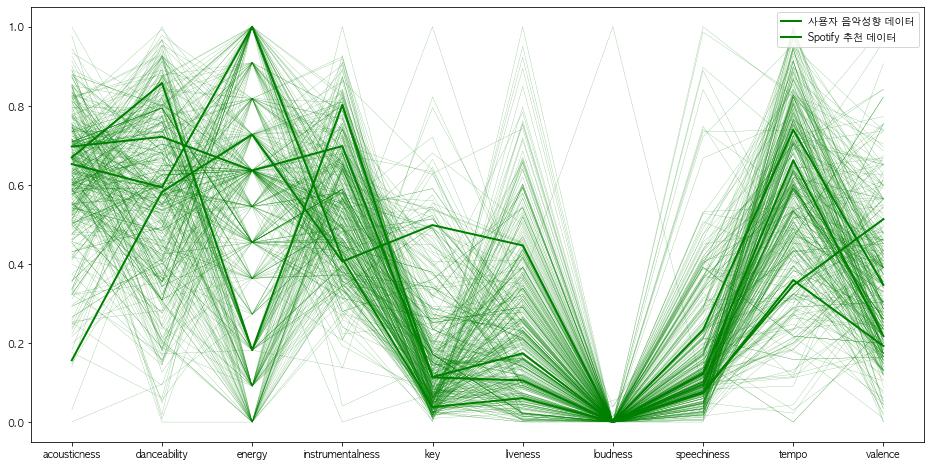

In [52]:
import matplotlib
import matplotlib.pyplot as plt

# 한글출력
matplotlib.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(16,8))
x_ticks_labels = norm_features.columns.difference(['id']).values

for _idx in range(len(norm_features)):
    feature = norm_features.iloc[_idx]
    _id = feature['id']
    if _id in sel_tracks['id'].values:
        plt.plot(x_ticks_labels, feature.values[1:],color="g", linewidth=2, label="사용자 음악성향 데이터")
    else:
        plt.plot(x_ticks_labels, feature.values[1:],color="g", linewidth=0.15, label="Spotify 추천 데이터")


plt.legend(labels=['사용자 음악성향 데이터', 'Spotify 추천 데이터'], loc='upper right')
plt.show()